<a href="https://colab.research.google.com/github/Tina-Mulu/Hypothyroid-prediction-in-patients/blob/main/Hypothyroid_prediction_in_patients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **# 1. Defining the question**

**a) Specifying the question**


Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

**b) Defining the Metric for success**

In [ ]:
You should not use individual decision trees, rather you should use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.
- Try and optimize each of the 2 models, making sure to document how you've set up your hyperparameters.
- Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction.
In this section, you may be required to clean the data a little bit so as to make sense of the features.

- Document what transformation you've done on the data.

- Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. 
Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. 
Use any two features to build the models for this step.

**c) Understanding the context**

You need to use random forests, gradient boosting and Ada boosting to determine which one brings the best results to your data. also apply advanced SVM using polynomial, Linear and rbf which one is best to use for hypertuning and bringing the right predictions to your data.

**d) Recording the experimental design**

random forests, ada boosing, gradient boosting, kernel in SVM

**e) Data Relevance**

In [ ]:
the data used can be found via this link .Source [Link]

# **2. Reading the data**

In [3]:
# loading the libraries
import pandas as pd
import numpy as np

# 
data = pd.read_csv('hypothyroid.csv')
data

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?


# **3. Checking the data**

In [3]:
# previewing the top of our dataset
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [ ]:
# previewing the bottom of our dataset
data.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [ ]:
# previewing the number of columns and rows
data.shape

(3163, 26)

In [ ]:
# checking if each column has the appropriate data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

# **4. Tidying the dataset**

In [4]:
# checking for null values
data = pd.read_csv('hypothyroid.csv', na_values = "?")
data

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,NaN
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,NaN
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,NaN
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,NaN
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58.0,F,f,f,f,f,f,f,f,f,f,f,f,y,5.8,y,1.7,y,86.0,y,0.91,y,95.0,n,NaN
3159,negative,29.0,F,f,f,f,f,f,f,f,f,f,f,f,y,0.8,y,1.8,y,99.0,y,1.01,y,98.0,n,NaN
3160,negative,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,1.2,y,0.6,y,71.0,y,0.68,y,104.0,n,NaN
3161,negative,74.0,F,f,f,f,f,f,f,f,f,f,f,f,y,1.3,y,0.1,y,65.0,y,0.48,y,137.0,n,NaN


In [5]:
# dealing with null values
data.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [6]:
data.drop(['TBG'], axis=1, inplace=True)

In [7]:
data.dropna(axis=0, inplace=True)

In [10]:
data.shape

# now that all the null values have been replaced we can go ahead with other clesning process

(2000, 25)

In [8]:
# checking for duplicates
data.duplicated().any()

True

In [9]:
# dropping the duplicates
data.drop_duplicates(inplace=True)


In [10]:
data.shape

(1946, 25)

In [ ]:

#Checking for outliers
import matplotlib.pyplot as plt
import seaborn as sns


Variables = ['age', 'tumor', 'lithium']

fig, ax = plt.subplots(len(Variables), figsize=(6,5))
fig.suptitle('Boxplots')

for i,col_val in enumerate(Variables):
    sns.boxplot(data[col_val],ax=ax[i])

plt.show

# there are no outliers in our data set

# **5. Explaratory Data Analysis**

a) Univariate data analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


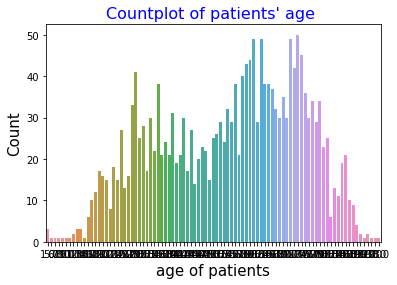

In [ ]:
# visualizing the age on a bar plot
import matplotlib.pyplot as plt

sns.countplot('age',data = data)
plt.xlabel("age of patients",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Countplot of patients' age ",fontsize=16,color='blue')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution on tumor')

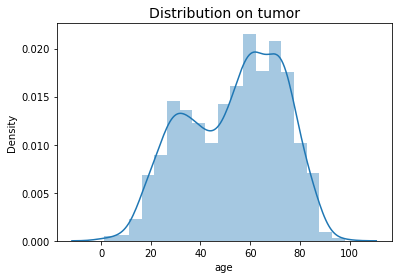

In [ ]:

#Checking the distribution of price
#

sns.distplot(data['age'])
plt.title('Distribution on tumor',size=14)

#The distribution is skewed to the right

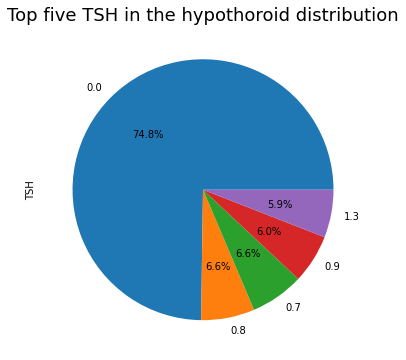

In [ ]:
#Pie chart on zip code popularity
#

data['TSH'].value_counts().head(5).plot.pie(figsize=(8,6),autopct='%1.1f%%')

plt.title('Top five TSH in the hypothoroid distribution',size=18)
plt.show()

# **Bivariate Data Analysis**

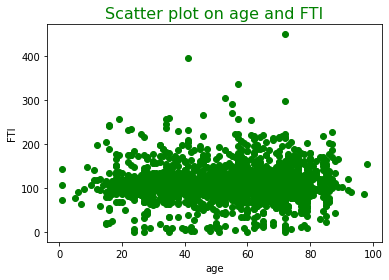

In [ ]:
#Scatter plot to check the relationship between various variables

#Scatter plot to check on relation between age and FTI
plt.scatter(data['age'],data['FTI'], color='Green')
plt.title('Scatter plot on age and FTI',size=16,color='Green')
plt.xlabel('age',size=10)
plt.ylabel('FTI',size=10)
plt.show()

# there is no relationship between age and FTI


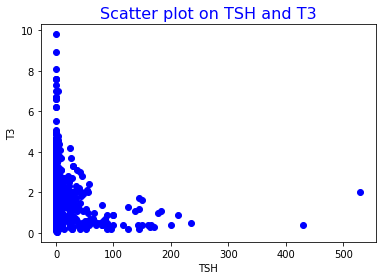

In [ ]:
#Scatter plot to check on relation between  and square feet area of parking Layout
plt.scatter(data['TSH'],data['T3'], color='blue')
plt.title('Scatter plot on TSH and T3',size=16,color='blue')
plt.xlabel('TSH',size=10)
plt.ylabel('T3',size=10)
plt.show()

# There is no relationship between the 2 either

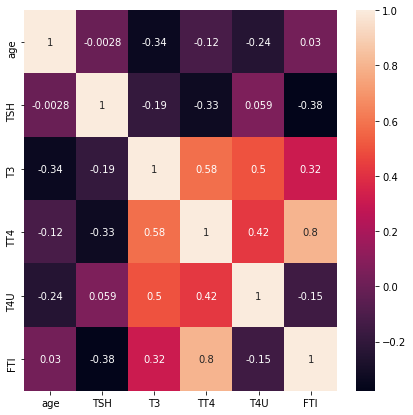

In [ ]:
#Creating the correlation heatmap
#to check the relationship among number of differents variables

variables = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']


fig, ax = plt.subplots(figsize=(7,7))        
sns.heatmap(data[variables].corr(),annot=True,ax=ax)
plt.show()

# **Encoding the dataset**

In [11]:
# Categorical boolean mask
categorical_feature_mask = data.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = data.columns[categorical_feature_mask].tolist()
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
data[categorical_cols] = data[categorical_cols].apply(lambda col: le.fit_transform(col))
data[categorical_cols]

,status,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3159,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3160,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3161,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,0,72.0,1,0,0,0,0,0,0,0,0,0,0,0,0,30.0,0,0.6,0,15.0,0,1.48,0,10.0,0
1,0,15.0,0,1,0,0,0,0,0,0,0,0,0,0,0,145.0,0,1.7,0,19.0,0,1.13,0,17.0,0
2,0,24.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.2,0,4.0,0,1.00,0,0.0,0
3,0,24.0,0,0,0,0,0,0,0,0,0,0,0,0,0,430.0,0,0.4,0,6.0,0,1.04,0,6.0,0
4,0,77.0,1,0,0,0,0,0,0,0,0,0,0,0,0,7.3,0,1.2,0,57.0,0,1.28,0,44.0,0


In [13]:
# dropping more columns
data.drop(['TSH_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured'], axis=1, inplace=True)

In [14]:
data.drop(['T3_measured', 'TBG_measured'], axis=1, inplace=True)

In [15]:
data.head(2)
# these are the columns we will work with going forward

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,0,72.0,1,0,0,0,0,0,0,0,0,0,0,0,30.0,0.6,15.0,1.48,10.0
1,0,15.0,0,1,0,0,0,0,0,0,0,0,0,0,145.0,1.7,19.0,1.13,17.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# We want to predict if someone is a social drinker, so let's use that column as our Y 
y = data['status'].values

test_features = data.drop(['status'], axis=1)
# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
X = data[test_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# **Random forests**

In [20]:
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# We want to predict if someone is a social drinker, so let's use that column as our Y 
y = data['status'].values


test_features = data.columns.to_list()
test_features.remove('status')

# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
X = data[test_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
# Import the model
from sklearn.ensemble import RandomForestClassifier

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,584.000000,584.000000
mean,0.938356,0.940068
std,0.240714,0.237563
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [22]:
import numpy as np
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# a RMSE OF 0.1095 is not bad for our model

Mean Absolute Error: 0.011986301369863013
Mean Squared Error: 0.011986301369863013
Root Mean Squared Error: 0.10948196824072452


In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.988013698630137

The model is 98.87% accurate

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


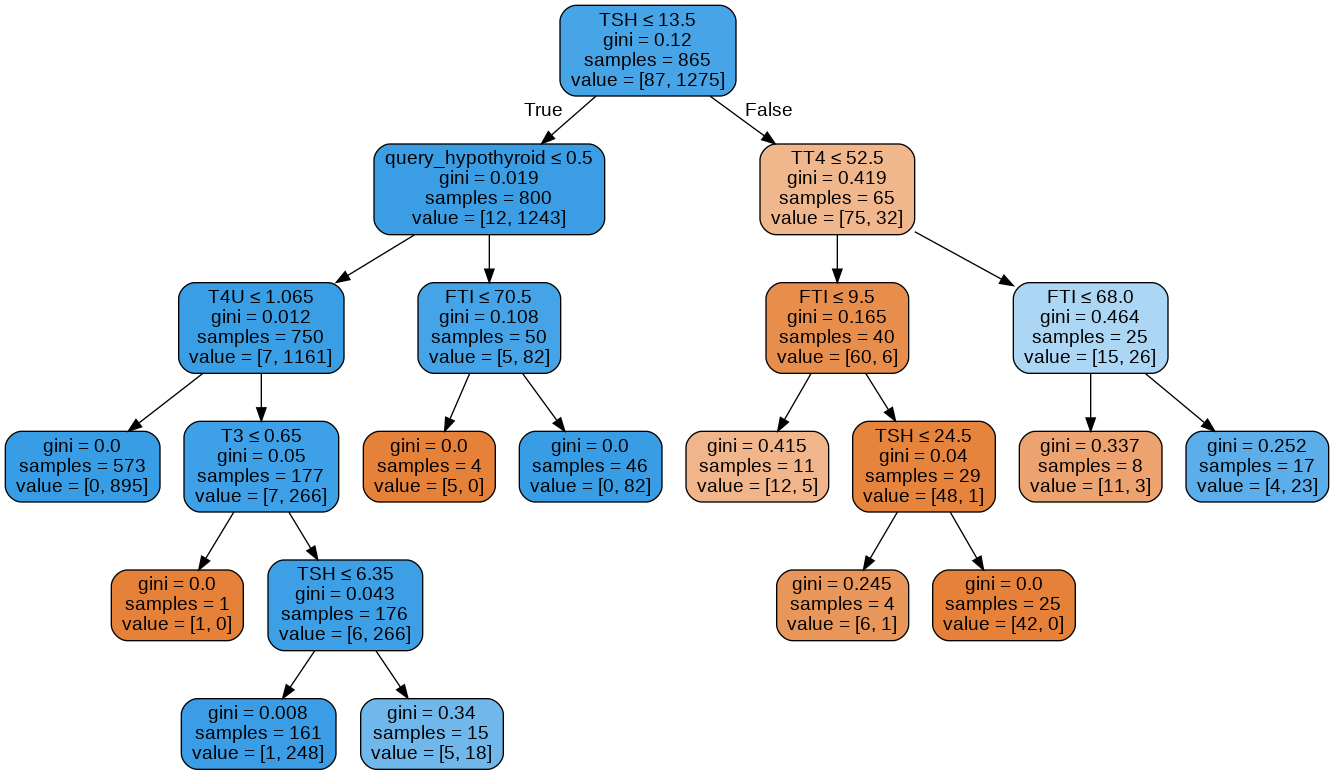

In [24]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('bank_forest.png')
Image(graph.create_png())

In [25]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.0), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH', 0.73), ('T3', 0.01), ('TT4', 0.11), ('T4U', 0.0), ('FTI', 0.14)]

Variable: TSH                  Importance: 0.73
Variable: FTI                  Importance: 0.14
Variable: TT4                  Importance: 0.11
Variable: T3                   Importance: 0.01
Variable: age                  Importance: 0.0
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: sick       

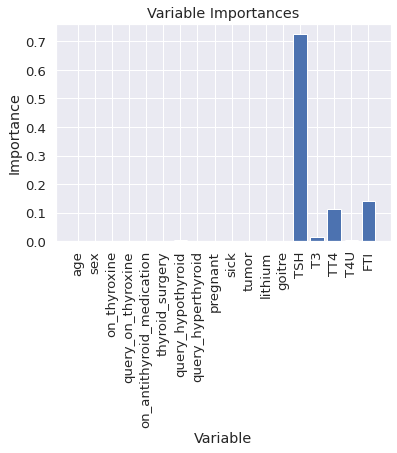

In [26]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

the measurements TSH, FTI, TT4, and T3 were the most important variables in making the predictions.

# **Using Adaboosting**

In [37]:
# Splitting the dataset

X = data.drop(['status'], axis=1)
y = data['status']
#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size = 0.2, random_state = 0)

In [46]:
# Import the model
from sklearn.ensemble import AdaBoostClassifier

#Training the ada boost tree algorithm
ada_boost = AdaBoostClassifier(n_estimators=100, random_state=None, learning_rate=1.0)
ada_boost = ada_boost.fit(X_train, y_train)

# Predict based on the model we've trained

y_pred_ada1 = ada_boost.predict(X_test)
y_pred_ada1

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [47]:
accuracy_score(y_test, y_pred_ada1)

0.982051282051282

In [ ]:
# Import the model
from sklearn.ensemble import AdaBoostClassifier

#Training the ada boost tree algorithm
ada_boost = AdaBoostClassifier(n_estimators=100, random_state=None, learning_rate=0.5)
ada_boost = ada_boost.fit(X_train, y_train)

# Predict based on the model we've trained

y_pred2 = ada_boost.predict(X_test)
y_pred2

In [45]:
accuracy_score(y_test, y_pred2)

0.9871794871794872

In [ ]:
# Import the model
from sklearn.ensemble import AdaBoostClassifier

#Training the ada boost tree algorithm
ada_boost = AdaBoostClassifier(n_estimators=100, random_state=None, learning_rate=2.0)
ada_boost = ada_boost.fit(X_train, y_train)

# Predict based on the model we've trained

y_pred3 = ada_boost.predict(X_test)
y_pred3

In [50]:
accuracy_score(y_test, y_pred3)


0.941025641025641

In [54]:
# Get numerical feature importances
importances = list(ada_boost.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.0), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH', 0.0), ('T3', 0.0), ('TT4', 0.0), ('T4U', 0.0), ('FTI', 1.0)]

Variable: FTI                  Importance: 1.0
Variable: age                  Importance: 0.0
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: sick                 Importance: 0.0
Variable: tumor                Importance: 0.0
Variable: lithium              Importance: 0.0
Variable: goitre             

FTI is the most important variable to use to predict the presence of hypothyroid with a model accuracy of 98.72% with a learning rate of  0.5

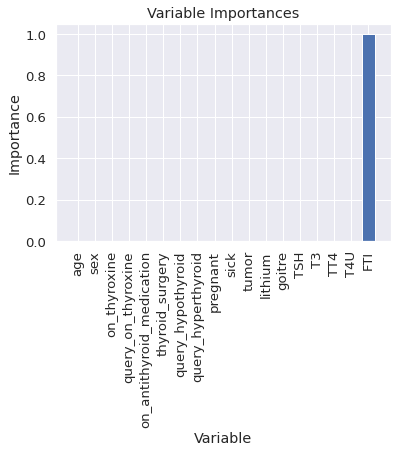

In [56]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, X.columns, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

# **Gradient boosted trees**

In [57]:
# Splitting the dataset

X = data.drop(['status'], axis=1)
y = data['status']
#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size = 0.2, random_state = 0)

In [67]:
# Import the model
from sklearn.ensemble import GradientBoostingClassifier

#Training the ada boost tree algorithm
target_number_of_trees = 100

gbr1 = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=1.0, max_depth=5)
gbr1 = gbr1.fit(X_train, y_train)

# Predict based on the model we've trained
y_predict= gbr1.predict(X_test)
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [68]:
accuracy_score(y_test, y_predict)

0.9794871794871794

after playing around with numbers, the maximum depth of 5 produced the best accuracy of 97.95%. 

after comparring the 3 models random forests was the best to use to determine whether the patient was likely to have hypothyroid with an accuracy of 98.87%.

## **Advanced SVM**

**Data Exploration**

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


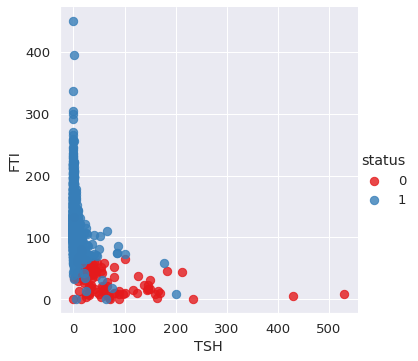

In [18]:
sns.lmplot('TSH', 'FTI', data=data, hue='status',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

**Splitting the data into train and test sets**

In [19]:
X = data[['TSH','FTI']]
y = data['status']
#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size = 0.2, random_state = 0)

**Fitting the model: Polynomial Model**




In [20]:
# Building the model 
polyclassifier = SVC(kernel='poly',degree=3,gamma='auto')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#Visualisation
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy
# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = polyclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
fig, ax = plt.subplots()
# title for the plots
title = ('Hypothyroidism Classification with polynomial SVC')
# Set-up grid for plotting.
X0, X1 = X['TSH'], X['FTI']
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, polyclassifier, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
# ax.set_ylabel()
# ax.set_xlabel()
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [21]:
# making prediction
y_pred = polyclassifier.predict(X_test)

In [22]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9743589743589743
[[ 19   4]
 [  6 361]]


# **Fitting the model: Radial Basis function(Rbf)**

In [23]:
# Building the model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**Visualization**

In [ ]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = rbfclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Flower Classification with rbf SVC')
# Set-up grid for plotting.
X0, X1 = X[TSH], X[FTI]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, rbfclassifier, xx, yy, cmap=plt.cm.autumn, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.autumn, s=20, edgecolors='k')

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

**Optimization : Parameter Tuning**

In [24]:
# making prediction
y_pred = rbfclassifier.predict(X_test

In [25]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9794871794871794
[[ 20   3]
 [  5 362]]


The model has a accuracy level of 97.94% 

# **Fitting the model: Sigmoid function**

In [29]:
# Building the model 
sigclassifier = SVC(kernel='sigmoid')
# Training the model using the training set
sigclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**Visualization**

In [ ]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = sigclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Flower Classification with sigmoid SVC')
# Set-up grid for plotting.
X0, X1 = X[TSH], X[FTI]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, sigclassifier, xx, yy, cmap=plt.cm.cool, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.cool, s=20, edgecolors='k')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [32]:
# making prediction
y_pred = sigclassifier.predict(X_test)

In [28]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.941025641025641
[[ 10  13]
 [ 10 357]]


the sigmoid function hasa 94.10 % accuracy level. 

# **Linear function**


In [33]:
# Let's now build the svm model 
thyroid_model = SVC(kernel = 'linear')
# Train the model using the training set
thyroid_model.fit(X_train,y_train)

# Predict the response for the test set
y_pred = thyroid_model.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [34]:
# Now that we have trained our model, let's test how well it can predict the breast cancer of a patient

# Checking the accurancy of the model
model_accuracy = accuracy_score(y_test,y_pred)
model_accuracy

0.9743589743589743

the model has an accuracy 0f 97.43%

In [35]:
# For further evaluation you can also check the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 20,   3],
       [  7, 360]])

**Comparison of the Kernel Performance**

When we compare the performance of the three kernel, it clear that sigmoid performs the worst. This is because the sigmoid function returns two values, 0 and 1 hence its more suited to binary classification problems.

On the other hand, we can see that the rbf kernel also know as Gaussian Kernel achieved a 97.48% prediction rate. However, there is no set rule as to which kernel to use for which scenario. the rule of thumb is that you should test all kernels and select the one that performs the best on your dataset

# **performing rbf using all the parameters**


In [69]:
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# We want to predict if someone is a social drinker, so let's use that column as our Y 
y = data['status'].values


test_features = data.columns.to_list()
test_features.remove('status')

# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
X = data[test_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [70]:
# Building the model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [73]:
# making prediction
y_pred = rbfclassifier.predict(X_test)

In [75]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))


0.9811643835616438


the model accuracy on using all the parameters has increased from 97.1% to 98.11%. in conclusion it is better to use the tuned model with all the features and not TSH and FTI only for optimal results.